In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler 

# Standardization

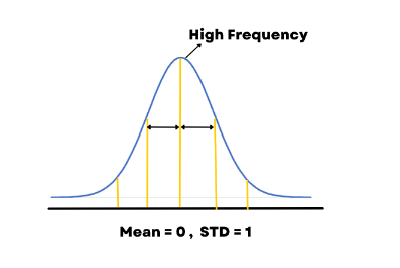 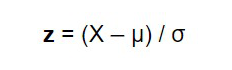

In [2]:
census = pd.read_csv("equitylayers.csv")
# equity = census.drop(columns=["id", "PopuDenPerKM"])
equity = census.drop(columns=["id", "PopuDenPerKM",'Immigrant%', 'VM%', '1-ParentFam%' ])
equity

,MBM%,LIM%,Neet%,%CHN,%Affordable,%ofWP,ShortTerm%
0,9.322,13.115,23.077,27.273,27.273,7.500,4.545
1,13.333,15.686,20.000,50.000,50.000,15.789,17.857
2,6.731,11.364,0.000,0.000,0.000,6.667,12.069
3,23.942,31.749,23.611,44.154,32.112,10.704,10.243
4,17.175,28.473,17.629,30.651,29.119,9.444,9.613
...,...,...,...,...,...,...,...
1060,4.093,12.665,10.396,10.714,21.429,0.000,9.261
1061,3.987,9.416,17.857,40.000,42.857,3.745,9.110
1062,4.694,9.765,14.085,31.250,33.333,4.580,12.086
1063,2.853,11.340,9.353,0.000,0.000,3.955,9.497


### StandardScalar() - z-score

In [5]:
scaler = StandardScaler()
scaled_equity = scaler.fit_transform(equity)

In [6]:
equity_scaled = pd.DataFrame(scaled_equity)
# equity_scaled.columns = ['Immigrant%', 'VM%', '1-ParentFam%', 'MBM%', 'LIM%','Neet%', '%CHN', '%Affordable', '%ofWP', 'ShortTerm%']
equity_scaled.columns = ['MBM%', 'LIM%',
       'Neet%', '%CHN', '%Affordable', '%ofWP', 'ShortTerm%']

<Axes: xlabel='ShortTerm%', ylabel='Density'>

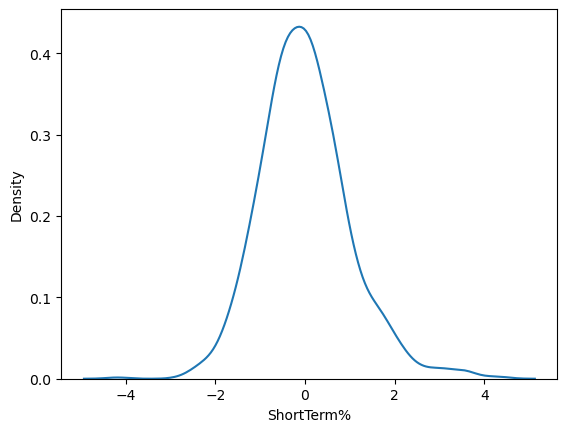

In [7]:
sns.kdeplot(data=equity_scaled, x="ShortTerm%")

In [9]:
equity_scaled

,MBM%,LIM%,Neet%,%CHN,%Affordable,%ofWP,ShortTerm%
0,-0.226128,-0.828709,1.611013,0.105628,-0.158467,-0.066860,-2.337337
1,0.549710,-0.472207,1.002562,2.353065,1.958901,2.056890,3.072054
2,-0.727299,-1.071508,-2.952273,-2.591355,-2.699363,-0.280285,0.720074
3,2.601784,1.755138,1.716608,1.774963,0.292360,0.754047,-0.021929
4,1.292859,1.300877,0.533716,0.439673,0.013517,0.431218,-0.277933
...,...,...,...,...,...,...,...
1060,-1.237561,-0.891108,-0.896550,-1.531864,-0.702924,-1.988457,-0.420969
1061,-1.258064,-1.341624,0.578801,1.364181,1.293421,-1.028940,-0.482329
1062,-1.121311,-1.293231,-0.167080,0.498908,0.406115,-0.815002,0.726982
1063,-1.477411,-1.074836,-1.102795,-2.591355,-2.699363,-0.975135,-0.325070


In [10]:
def add_row_sum_and_normalize(df):
    # Sum the values of the first 11 columns for each row
    df['row_sum'] = df.iloc[:, 0:10].sum(axis=1)
    
    # Calculate the min and max values of the 'row_sum' column
    min_value = df['row_sum'].min()
    max_value = df['row_sum'].max()
    
    # Apply min-max normalization
    df['normalized_row_sum'] = (df['row_sum'] - min_value) / (max_value - min_value)
    
    return df

In [11]:
data = add_row_sum_and_normalize(equity_scaled)
data

,MBM%,LIM%,Neet%,%CHN,%Affordable,%ofWP,ShortTerm%,row_sum,normalized_row_sum
0,-0.226128,-0.828709,1.611013,0.105628,-0.158467,-0.066860,-2.337337,-1.900859,0.400296
1,0.549710,-0.472207,1.002562,2.353065,1.958901,2.056890,3.072054,10.520974,0.782579
2,-0.727299,-1.071508,-2.952273,-2.591355,-2.699363,-0.280285,0.720074,-9.602010,0.163292
3,2.601784,1.755138,1.716608,1.774963,0.292360,0.754047,-0.021929,8.872970,0.731862
4,1.292859,1.300877,0.533716,0.439673,0.013517,0.431218,-0.277933,3.733928,0.573707
...,...,...,...,...,...,...,...,...,...
1060,-1.237561,-0.891108,-0.896550,-1.531864,-0.702924,-1.988457,-0.420969,-7.669434,0.222767
1061,-1.258064,-1.341624,0.578801,1.364181,1.293421,-1.028940,-0.482329,-0.874553,0.431881
1062,-1.121311,-1.293231,-0.167080,0.498908,0.406115,-0.815002,0.726982,-1.764619,0.404489
1063,-1.477411,-1.074836,-1.102795,-2.591355,-2.699363,-0.975135,-0.325070,-10.245965,0.143474


In [13]:
id = census[["id"]]
id

,id
0,5350001.00
1,5350002.00
2,5350003.00
3,5350004.00
4,5350005.00
...,...
1060,5350586.05
1061,5350587.01
1062,5350587.02
1063,5350802.01


In [17]:
join = id.join(data, how="left")
join = join[["id","normalized_row_sum"]]
join = join.rename(columns={'id': 'ctuid', 'normalized_row_sum': 'Equity Index'})
join

,ctuid,Equity Index
0,5350001.00,0.400296
1,5350002.00,0.782579
2,5350003.00,0.163292
3,5350004.00,0.731862
4,5350005.00,0.573707
...,...,...
1060,5350586.05,0.222767
1061,5350587.01,0.431881
1062,5350587.02,0.404489
1063,5350802.01,0.143474


In [19]:
#Find breakpoint for each of the quintile

def find_quintile_cutoffs(df):
    # Calculate the quintiles
    quintiles = pd.qcut(df['Equity Index'], 5, labels=False, duplicates='drop')
    
    # Get the cut-off points
    cut_off_points = pd.qcut(df['Equity Index'], 5, retbins=True, duplicates='drop')[1]
    
    return cut_off_points

find_quintile_cutoffs(join)

array([0.        , 0.35844009, 0.42615989, 0.4841004 , 0.55319036,
       1.        ])

In [20]:
join.to_csv("equity_index.csv", index=False)